### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to **distinguish between customers who accepted a driving coupon versus those that did not**.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether they will accept the coupon if they are the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [34]:
# What is the size of this dataset and the column types?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Initial thoughts of this data:
- passanger is spelled wrong, fix
- mix of CamelCase and snake_case, standardize to one
- car column has almost no data
- Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50 are missing some data
- most of these columns are categorical and may need to be mapped to numeric for analysis

In [19]:
# What is the coupon column?  Based on the names this appears to what the coupon was for, eg coffee house vs bar
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

**TODO:**

`coupon`, update the values here to match the corresponding column names

In [28]:
# Very few rows have values for the car column. This column is likely not useful in our analysis.
data['car'].value_counts()
# TODO: Drop car column

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [14]:
data['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [15]:
data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [16]:
data['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [17]:
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [18]:
# This must be number of times they go to a restaurant with average expense between $20-50
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

#### Let's look at the location columns:

In [59]:
data['toCoupon_GEQ5min'].value_counts()

toCoupon_GEQ5min
1    12684
Name: count, dtype: int64

In [21]:
data['toCoupon_GEQ15min'].value_counts()

toCoupon_GEQ15min
1    7122
0    5562
Name: count, dtype: int64

In [22]:
data['toCoupon_GEQ25min'].value_counts()

toCoupon_GEQ25min
0    11173
1     1511
Name: count, dtype: int64

#### To Coupon Columns
Every row has the 5min column set to 1. So this column likely not informative.

In [24]:
data['direction_same'].value_counts()

direction_same
0    9960
1    2724
Name: count, dtype: int64

In [61]:
data['direction_opp'].value_counts()  # same and opposite columns align in counts

direction_opp
1    9960
0    2724
Name: count, dtype: int64

In [35]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [44]:
# Create a new DataFrame with columns renamed
column_map = {
    'passanger': 'passenger',
    'maritalStatus': 'marital_status',
    'Bar': 'bar',
    'CoffeeHouse': 'coffee_house',
    'CarryAway': 'carry_away',
    'RestaurantLessThan20': 'restaurant_20',
    'Restaurant20To50': 'restaurant_50',
    'toCoupon_GEQ5min': 'to_coupon_5min',
    'toCoupon_GEQ15min': 'to_coupon_15min',
    'toCoupon_GEQ25min': 'to_coupon_25min',
}

In [45]:
df = data.rename(columns=column_map)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   destination      12684 non-null  object
 1   passenger        12684 non-null  object
 2   weather          12684 non-null  object
 3   temperature      12684 non-null  int64 
 4   time             12684 non-null  object
 5   coupon           12684 non-null  object
 6   expiration       12684 non-null  object
 7   gender           12684 non-null  object
 8   age              12684 non-null  object
 9   marital_status   12684 non-null  object
 10  has_children     12684 non-null  int64 
 11  education        12684 non-null  object
 12  occupation       12684 non-null  object
 13  income           12684 non-null  object
 14  car              108 non-null    object
 15  bar              12577 non-null  object
 16  coffee_house     12467 non-null  object
 17  carry_away       12533 non-null

In [49]:
# Look at an example row
df.iloc[100]

destination          No Urgent Place
passenger                      Alone
weather                        Sunny
temperature                       55
time                            10AM
coupon                  Coffee House
expiration                        2h
gender                          Male
age                               21
marital_status                Single
has_children                       0
education          Associates degree
occupation                   Student
income               $12500 - $24999
car                              NaN
bar                              1~3
coffee_house                   less1
carry_away                       1~3
restaurant_20                  less1
restaurant_50                    1~3
to_coupon_5min                     1
to_coupon_15min                    0
to_coupon_25min                    0
direction_same                     0
direction_opp                      1
Y                                  1
Name: 100, dtype: object

3. Decide what to do about your missing data -- drop, replace, other...

In [52]:
# Drop car
df = df.drop(columns=['car'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   destination      12684 non-null  object
 1   passenger        12684 non-null  object
 2   weather          12684 non-null  object
 3   temperature      12684 non-null  int64 
 4   time             12684 non-null  object
 5   coupon           12684 non-null  object
 6   expiration       12684 non-null  object
 7   gender           12684 non-null  object
 8   age              12684 non-null  object
 9   marital_status   12684 non-null  object
 10  has_children     12684 non-null  int64 
 11  education        12684 non-null  object
 12  occupation       12684 non-null  object
 13  income           12684 non-null  object
 14  bar              12577 non-null  object
 15  coffee_house     12467 non-null  object
 16  carry_away       12533 non-null  object
 17  restaurant_20    12554 non-null

### Duplicates?

In [70]:
# Any duplicate rows?
dups = df[df.duplicated()]
dups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 4192 to 8516
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   destination      74 non-null     object
 1   passenger        74 non-null     object
 2   weather          74 non-null     object
 3   temperature      74 non-null     int64 
 4   time             74 non-null     object
 5   coupon           74 non-null     object
 6   expiration       74 non-null     object
 7   gender           74 non-null     object
 8   age              74 non-null     object
 9   marital_status   74 non-null     object
 10  has_children     74 non-null     int64 
 11  education        74 non-null     object
 12  occupation       74 non-null     object
 13  income           74 non-null     object
 14  bar              74 non-null     object
 15  coffee_house     74 non-null     object
 16  carry_away       73 non-null     object
 17  restaurant_20    73 non-null     obje

In [69]:
dups

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,coffee_house,carry_away,restaurant_20,restaurant_50,to_coupon_5min,to_coupon_15min,to_coupon_25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


This data is anonymized, as best I can tell there is no unique ID for each row, so it seems entirely possible we could have matching rows that are not "duplicate" in the sense of the same person. We could simply be seeing similar bucketed conditions. This row count is also small, 74 out of 12684 rows, so for now I'll leave these rows in the dataset.

In [73]:
df['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [74]:
coupon_map = {
    'Coffee House': 'coffee_house',
    'Restaurant(<20)': 'restaurant_20',
    'Carry out & Take away': 'carry_away',
    'Bar': 'bar',
    'Restaurant(20-50)': 'restaurant_50',
}

4. What proportion of the total observations chose to accept the coupon? 



In [80]:
df['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

In [100]:
prop_said_yes = (df[ df['Y'] == 1].shape[0] / df.shape[0]) * 100
print(f'Proportion of individuals that accepted the coupon is {round(prop_said_yes, 2)}%')

Proportion of individuals that accepted the coupon is 56.84%


5. Use a bar plot to visualize the `coupon` column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

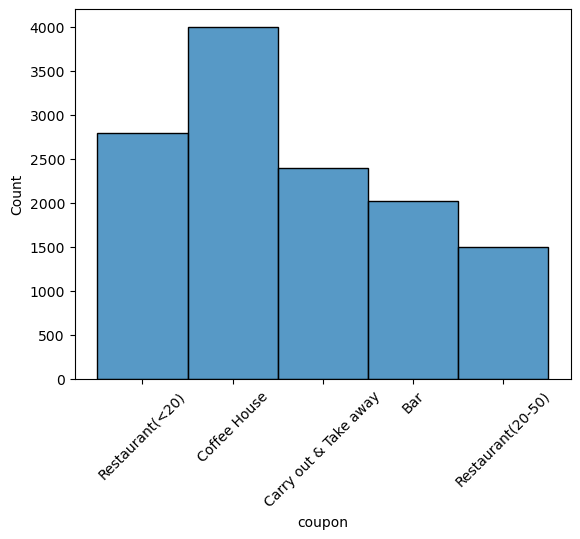

In [105]:
sns.histplot(df, x='coupon')
plt.xticks(rotation=45)

Most of the coupons are for a coffee house. Looking at the plot above, the majority of the coupons are for lower cost items.

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temperature', ylabel='Count'>

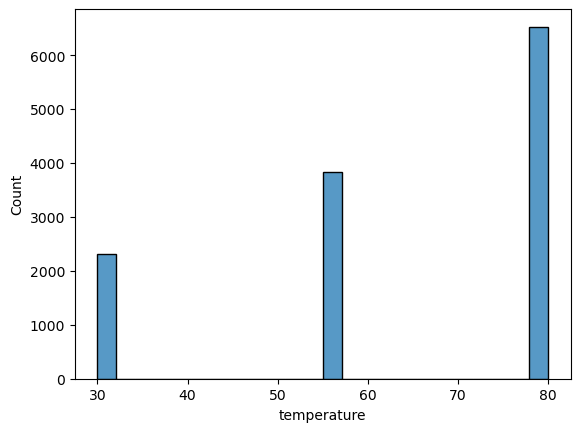

In [101]:
sns.histplot(df, x='temperature')

In [102]:
df['temperature'].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

### Temperature
Temperature is a numeric column, but looking at the values this is a categorical variable. There are only 3 temperature buckets and it's highly unlikely that of the ~12,000 samples only 3 discrete temperatures were observed.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [137]:
df_bar = df.query('coupon == "Bar"')
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   destination      2017 non-null   object
 1   passenger        2017 non-null   object
 2   weather          2017 non-null   object
 3   temperature      2017 non-null   int64 
 4   time             2017 non-null   object
 5   coupon           2017 non-null   object
 6   expiration       2017 non-null   object
 7   gender           2017 non-null   object
 8   age              2017 non-null   object
 9   marital_status   2017 non-null   object
 10  has_children     2017 non-null   int64 
 11  education        2017 non-null   object
 12  occupation       2017 non-null   object
 13  income           2017 non-null   object
 14  bar              1996 non-null   object
 15  coffee_house     1978 non-null   object
 16  carry_away       1993 non-null   object
 17  restaurant_20    1994 non-null   obje

2. What proportion of bar coupons were accepted?


In [138]:
prop_bar_yes = (df_bar[ df_bar['Y'] == 1].shape[0] / df_bar.shape[0]) * 100
print(f'Proportion of bar coupons accepted {round(prop_bar_yes, 2)}%')

Proportion of bar coupons accepted 41.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [139]:
df_bar['bar'].value_counts()

bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [142]:
df_bar_3 = df_bar.query('bar in ("never", "less1", "1~3")')
df_bar_3['Y'].value_counts()

Y
0    1131
1     666
Name: count, dtype: int64

In [143]:
df_bar_4up = df_bar.query('bar in ("4~8", "gt8")')
df_bar_4up['Y'].value_counts()

Y
1    153
0     46
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bar', ylabel='Count'>

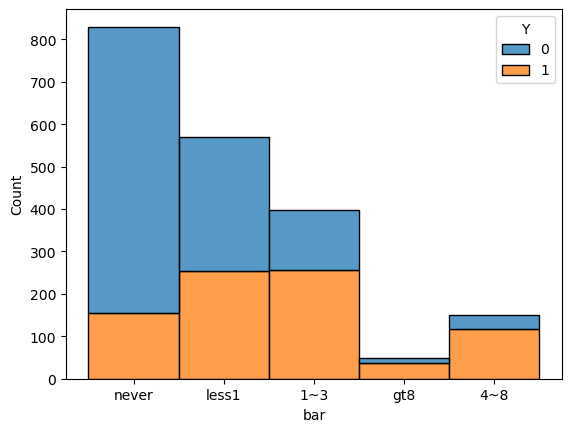

In [149]:
sns.histplot(df_bar, x='bar', hue='Y', multiple='stack')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0, 0, '33.77%'),
 Text(0, 0, '15.88%'),
 Text(0, 0, '7.01%'),
 Text(0, 0, '0.65%'),
 Text(0, 0, '1.65%')]

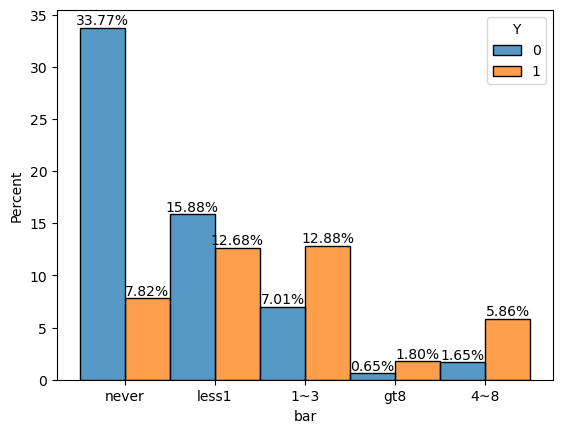

In [170]:
ax = sns.histplot(df_bar, x='bar', hue='Y', multiple='dodge', stat='percent')
ax.bar_label(ax.containers[0], fmt='%.2f%%')
ax.bar_label(ax.containers[1], fmt='%.2f%%')

In [167]:
plt.bar_label?

Signature:
plt.bar_label(
    container: 'BarContainer',
    labels: 'ArrayLike | None' = None,
    *,
    fmt: 'str | Callable[[float], str]' = '%g',
    label_type: "Literal['center', 'edge']" = 'edge',
    padding: 'float' = 0,
    **kwargs,
) -> 'list[Annotation]'
Docstring:
Label a bar plot.

Adds labels to bars in the given `.BarContainer`.
You may need to adjust the axis limits to fit the labels.

Parameters
----------
container : `.BarContainer`
    Container with all the bars and optionally errorbars, likely
    returned from `.bar` or `.barh`.

labels : array-like, optional
    A list of label texts, that should be displayed. If not given, the
    label texts will be the data values formatted with *fmt*.

fmt : str or callable, default: '%g'
    An unnamed %-style or {}-style format string for the label or a
    function to call with the value as the first argument.
    When *fmt* is a string and can be interpreted in both formats,
    %-style takes precedence over {}-style.


### TRy AGAIN

In [136]:
bar_map = {
    'never': 0,
    'less1': 1,
    '1~3': 3,
    '4~8': 8,
    'gt8': 10,
}
df_bar['bar_num'] = df_bar['bar'].replace(to_replace=bar_map)
#df_bar['bar'].value_counts()
df_bar.iloc[10]

/var/folders/n5/n6rb97jj00v5yg5zqw69hd4c0000gn/T/ipykernel_68690/2324949402.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar['bar_num'] = df_bar['bar'].replace(to_replace=bar_map)


destination                              Home
passenger                               Alone
weather                                 Sunny
temperature                                55
time                                      6PM
coupon                                    Bar
expiration                                 1d
gender                                   Male
age                                        46
marital_status                Married partner
has_children                                1
education                    Bachelors degree
occupation         Education&Training&Library
income                        $75000 - $87499
bar                                     less1
coffee_house                              1~3
carry_away                                1~3
restaurant_20                             1~3
restaurant_50                           less1
to_coupon_5min                              1
to_coupon_15min                             0
to_coupon_25min                   

In [124]:
df_bar

9        None
13       None
17       None
24       None
35       None
         ... 
12663    None
12664    None
12667    None
12670    None
12682    None
Name: bar, Length: 2017, dtype: object

In [120]:
df_bar['bar']

9        None
13       None
17       None
24       None
35       None
         ... 
12663    None
12664    None
12667    None
12670    None
12682    None
Name: bar, Length: 2017, dtype: object

In [116]:
df_bar[ (df_bar['Y'] == 1) & (df_bar['bar'] <= 3)].shape

(0, 25)

In [117]:
df_bar[ (df_bar['Y'] == 1) & (df_bar['bar'] > 3)].shape

(0, 25)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  